<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Likelihood function, prior distribution and posterior distribution

---

## Learning Objectives

- Discuss the role of the likelihood function in linear and logistic regression
- Distinguish between frequentist and Bayesian approach

<h1>Lesson Guide<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Learning-Objectives" data-toc-modified-id="Learning-Objectives-1">Learning Objectives</a></span></li><li><span><a href="#Loss-function-and-likelihood-function" data-toc-modified-id="Loss-function-and-likelihood-function-2">Loss function and likelihood function</a></span></li><li><span><a href="#Example:-Gaussian-variable" data-toc-modified-id="Example:-Gaussian-variable-3">Example: Gaussian variable</a></span><ul class="toc-item"><li><span><a href="#Generate-data" data-toc-modified-id="Generate-data-3.1">Generate data</a></span></li><li><span><a href="#Fit-sklearn-model" data-toc-modified-id="Fit-sklearn-model-3.2">Fit sklearn model</a></span></li><li><span><a href="#Calculate-the-likelihood-function-in-dependence-of-the-beta-coefficient" data-toc-modified-id="Calculate-the-likelihood-function-in-dependence-of-the-beta-coefficient-3.3">Calculate the likelihood function in dependence of the beta coefficient</a></span></li></ul></li><li><span><a href="#Example:-Bernoulli-trials" data-toc-modified-id="Example:-Bernoulli-trials-4">Example: Bernoulli trials</a></span><ul class="toc-item"><li><span><a href="#Simulate-Bernoulli-trials" data-toc-modified-id="Simulate-Bernoulli-trials-4.1">Simulate Bernoulli trials</a></span></li><li><span><a href="#Obtain-the-likelihood-function" data-toc-modified-id="Obtain-the-likelihood-function-4.2">Obtain the likelihood function</a></span></li></ul></li><li><span><a href="#Bayesian-modeling" data-toc-modified-id="Bayesian-modeling-5">Bayesian modeling</a></span></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-6">Conclusions</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## Loss function and likelihood function

So far we have used a loss function (residual sum of squares (RSS)) which we minimized to find the optimal solution. 

In linear regression we minimized the residual sum of squares 

$$
{\rm RSS} = \sum_{i=1}^n \epsilon_i^2 = \sum_{i=1}^n (y_i-(\beta_0+\beta_1 x_{i 1}+\beta_2 x_{i 2}+ \ldots)^2
$$

to determine the optimal set of beta coefficients. 

We can equally formulate everything in terms of a likelihood function which expresses how likely it is to observe the data given the model parameters. Generically one would determine

$$
p({\rm data}|model)
$$

For linear regression, the data would be the residuals obtained depending on the choice of the model coefficients. How likely residuals of a certain size are depends additionally on the standard deviation of the residuals.


$$
p({\epsilon}|\beta_0, \beta_1, \ldots, \sigma)
$$

Whereas the RSS does not make any assumption about the distribution of the residuals, to determine the likelihood of the residuals we need to assume some distribution. Often one assumes that the residuals are normally distributed and independent of each other. Then the probability distribution function for the i-th residual is

$${\rm pdf}\left(\epsilon_i;\sigma\right) 
= \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{\epsilon_i^2}{2\sigma^2}}
= \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{\left(y_i-(\beta_0+\beta_1 x_{i1}+\ldots)\right)^2}{2\sigma^2}}
$$

Then the likelihood function expresses how likely it is to observe all the residuals of all observations together (this is the joint probability) and will be the product of the pdfs of all residuals $\epsilon_i$:

$$L = {\rm pdf}(\epsilon_1) \cdot {\rm pdf}(\epsilon_2) \cdots  {\rm pdf}(\epsilon_n)$$

Inserting the normal distribution for each data point, we get

$$
\begin{eqnarray*}
L &=& 
\frac{1}{(\sqrt{2\pi\sigma^2})^n}
e^{-\frac{\epsilon_1^2}{2\sigma^2}}\cdot e^{-\frac{\epsilon_2^2}{2\sigma^2}}\cdots 
e^{-\frac{\epsilon_n^2}{2\sigma^2}}\\
&=&
\frac{1}{(\sqrt{2\pi\sigma^2})^n}
e^{-\frac{1}{2\sigma^2}(\epsilon_1^2+\epsilon_2^2+\ldots+\epsilon_n^2)}\\
&=& \frac{1}{(\sqrt{2\pi\sigma^2})^n}
e^{-\frac{1}{2\sigma^2}{\rm RSS}}
\end{eqnarray*}
$$


The expression in the exponent contains just the RSS, so due to the negative sign the minimal RSS maximizes the likelihood function. So we obtain the same optimal solution as usual by maximizing the likelihood. 

Taking the logarithm of the likelihood gives the log-likelihood. Doing so is advantageous because the logarithm of a product is the sum of the logarithms of the individual terms.

The log-likelihood function is maximal at the same place where our RSS loss function was minimal.

In [2]:
# log-example
np.log(3*4)

2.4849066497880004

In [3]:
np.log(3) + np.log(4)

2.4849066497880004

## Example: Gaussian variable

### Generate data

We generate a data sample for a linear regression. Then we can compare the maximum likelihood fit against the "true" model.

Our "true" model will be 

$$
y = 2 x +\epsilon
$$

with normally distributed residuals, $\epsilon\sim N(\mu=0, \sigma=10)$. We will try to estimate $\beta_1=2$ from our data. The maximum likelihood estimate based on our data sample will not agree exactly with the true value.

In [4]:
from scipy.stats import norm

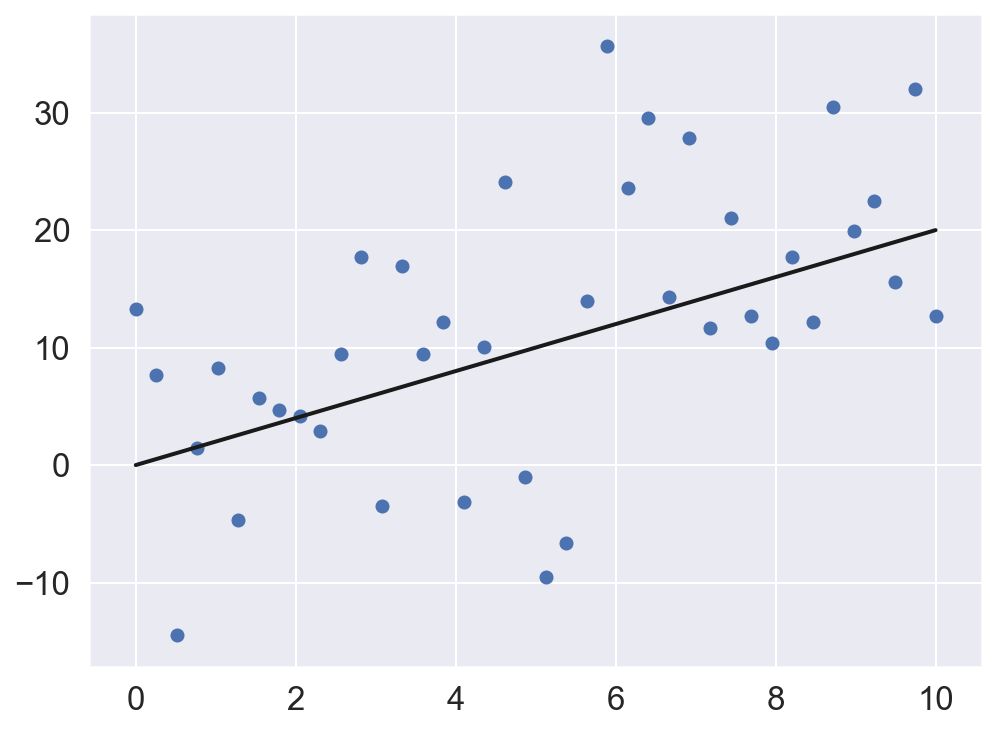

In [5]:
# number of trials
n = 40
# standard deviation
sigma = 10
# define gaussian
gaussian = norm(0, sigma)
# set up a regression between y and x
x = np.linspace(0, 10, n)
y = 2*x + gaussian.rvs(n, random_state=10)

# plot the related variables
plt.figure(figsize=(8, 6))
plt.plot(x, 2*x, lw=2, c='k')
plt.scatter(x, y)
plt.show()

### Fit sklearn model

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
# fit the linear regression model
model = LinearRegression(fit_intercept=False)
model.fit(x.reshape(-1, 1), y)
model.coef_

array([2.29733707])

In [8]:
import statsmodels.api as sm

In [9]:
sm_model = sm.OLS(y, x.reshape(-1, 1))
result = sm_model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.658
Model:                            OLS   Adj. R-squared (uncentered):              0.650
Method:                 Least Squares   F-statistic:                              75.14
Date:                Sun, 09 Feb 2020   Prob (F-statistic):                    1.24e-10
Time:                        15:25:56   Log-Likelihood:                         -147.30
No. Observations:                  40   AIC:                                      296.6
Df Residuals:                      39   BIC:                                      298.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.2973      0.265      8.669      0.000       1.761       2.833
==============================================================================
Omnibus:                        0.149   Durbin-Watson:                   1.789
Prob(Omnibus):                  0.928   Jarque-Bera (JB):                0.292
Skew:                          -0.126   Prob(JB):                        0.864
Kurtosis:                       2.665   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The estimate shows that even though we have not determined the true parameter exactly, the true parameter is contained within the confidence interval, the predictor variable serves for explaining the target variable and the null hypothesis that the residuals are normally distributed can be accepted.

### Calculate the likelihood function in dependence of the beta coefficient

In [10]:
def residuals_prod(beta, y, x, sigma):
    residual = y - beta*x
    epsilon = - np.dot(residual, residual) / (2*sigma**2)
    joint_probability = np.prod(epsilon)
    return joint_probability

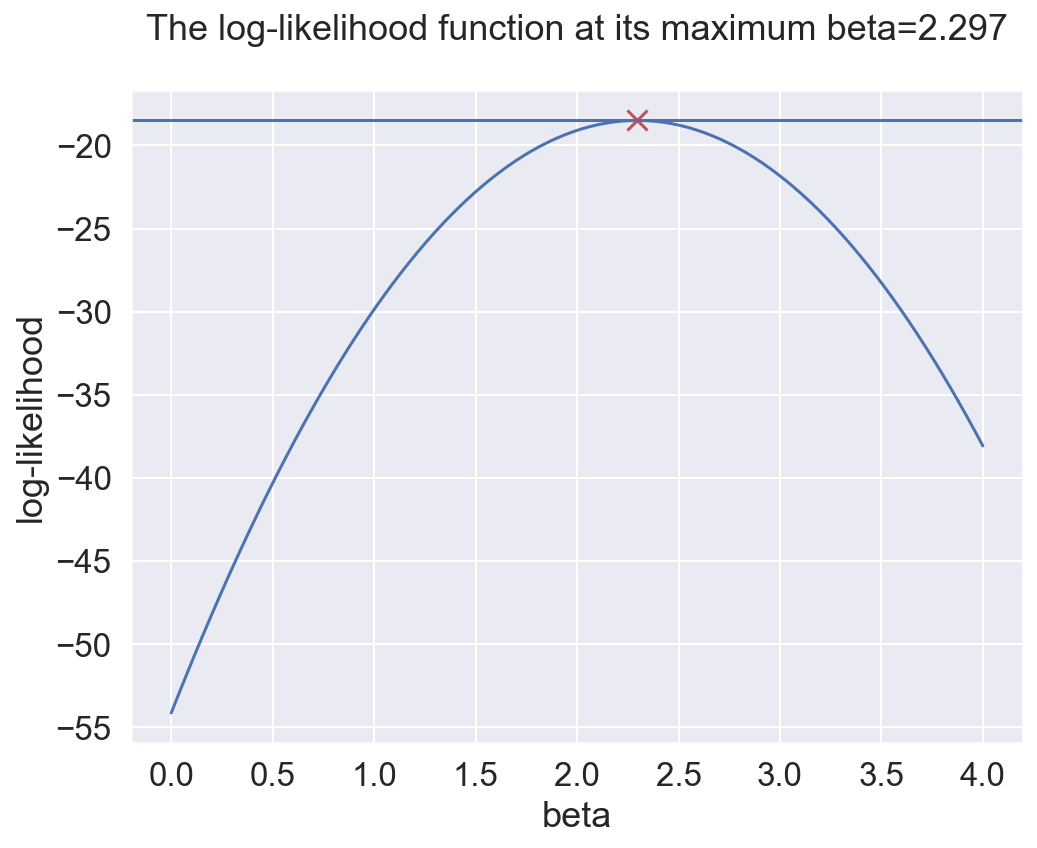

In [11]:
x_vals = np.linspace(0, 4, 100)
y_vals = [(residuals_prod(beta, y, x, sigma)) for beta in x_vals]
plt.figure(figsize=(8, 6))
plt.axhline(max(y_vals))
plt.scatter(model.coef_, max(y_vals), color='r', marker='x', s=100)
plt.plot(x_vals, y_vals)
plt.title(
    'The log-likelihood function at its maximum beta={}\n'.format(
        np.round(model.coef_[0], 3)))
plt.xlabel('beta')
plt.ylabel('log-likelihood')

plt.show()

## Example: Bernoulli trials

Consider $n$ independent Bernoulli trials, for example throwing a coin or measuring if a person has cancer or not. The Bernoulli distribution with probability $P$ (let's say for obtaining head) is

$$f(x_i|P) = P^{x_i}(1-P)^{1-x_i}$$ 

where 

$$x_i=\begin{cases} 1 {\rm\ for\ head} \\ 0 {\rm\ for\ tail} \\ \end{cases}$$

For $n$ trials, this gives the likelihood

$$L(x_i;P) = P^{x_1}(1-P)^{1-x_1}\cdot P^{x_2}(1-P)^{1-x_2}\cdots P^{x_n}(1-P)^{1-x_n} \ .$$

To maximize the likelihood, we take the derivative and set it equal to 0. For the product above, that gets quickly complicated, so instead one works again with the logarithm which gives

$$
\begin{eqnarray*}
\log L(x_i;P) &=& x_1 \log P+(1-x_1)\log(1-P)\\
&&+x_2 \log P+(1-x_2)\log(1-P)\\
&&+
\ldots\\
&&+x_n \log P+(1-x_n)\log(1-P)
\end{eqnarray*}
$$

The probability which maximizes $L$ is 

$$
P = \frac{1}{n}\sum_{i=1}^n x_i
$$

which in this case is not really surprising.

### Simulate Bernoulli trials

Let's try it out by simulation. We fix the probability $p$ for obtaining a 1, then obtain a random variate sample and use the sample to infer what $p$ should be.

In [12]:
from scipy.stats import bernoulli

In [13]:
# define the Bernoulli distribution
bern = bernoulli(0.4)
# number of trials
n = 25
# create random samples
values = bern.rvs(size=n, random_state=2)
# number of ones contained in values
k = sum(values)
print(values)
print(np.unique(values, return_counts=True))

[0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0]
(array([0, 1]), array([20,  5]))


### Obtain the likelihood function

In [14]:
p = np.linspace(0.01, 0.99, 100)
y_values = [(values*np.log(p_i)+(1-values)*np.log(1-p_i)).sum() for p_i in p]
likelihood_max = k/n
y_values_max = k*np.log(likelihood_max)+(n-k)*np.log(1-likelihood_max)

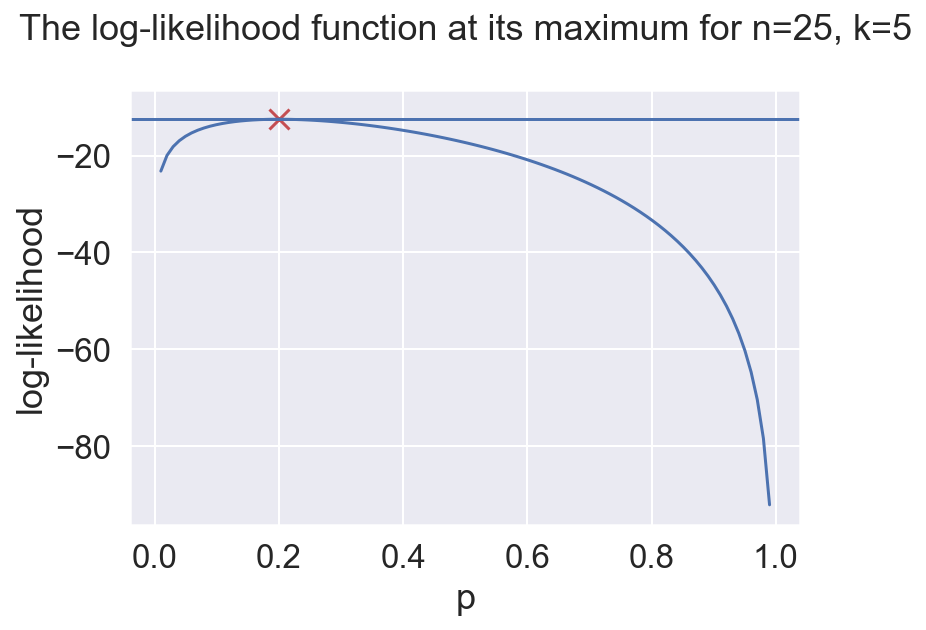

In [15]:
plt.plot(p, y_values)
plt.axhline(y_values_max)
plt.scatter(likelihood_max, y_values_max, color='r', marker='x', s=100)
plt.title('The log-likelihood function at its maximum for n={}, k={}\n'.format(n, k))
plt.xlabel('p')
plt.ylabel('log-likelihood')
plt.show()

From our data sample, we conclude that the best estimate for the probability of having head is 0.2, even though the true value is 0.4.

## Bayesian modeling

In the frequentist formulation, we ask how likely it is to observe the data given the model. Often the more interesting question would be to know how likely the model is given the data. This is exactly what Bayesian modeling is about.

In the Bayesian formulation, the likelihood function is combined with some prior believe to obtain a posterior probability distribution.

$$P\left(model\;|\;data\right) = \frac{P\left(data\;|\;model\right)}{P(data)}\; P\left(model\right)$$


**The Prior**

$$ \text{prior} = P\left(model\right) $$

The prior is our belief in the model given no additional information. This model could be as simple as a statistic, such as the mean we're measuring, or a linear regression. The prior would express the probability of having this mean or the regression model (i.e. its regression coefficients).

**The Likelihood**

$$ \text{likelihood} = P\left(data\;|\;model\right) $$

The likelihood is the probability of the data we observed occurring given the model. For example, assuming that a coin is biased toward heads with a mean rate of heads of 0.9, what is the likelihood that we observe 10 tails and two heads in 12 coin flips?

The likelihood is, in fact, the main object of frequentist statistical methods. 

**The Marginal Probability or Total Probability of the Data**

$$ \text{marginal probability of data} = P(data) $$

The marginal probability of the data is the probability that our data are observed regardless of what model we choose or believe in. We divide by this value to ensure that what we get on the other side is a true probability distribution — more on this later. It therefore serves as a normalization factor.

**The Posterior**

$$ \text{posterior} = P\left(model\;|\;data\right) $$

The posterior is our _updated_ belief in the model given the new data we have observed. Bayesian statistics are all about updating a prior belief we have about the world with new data, so we're transforming our _prior_ belief into this new _posterior_ belief about the world.


We can think in this picture about having some believe before seeing (additional) data which is corrected by taking data into account. The big difference is that we don't have to think about "true" fixed model parameters - instead we will have probabilities associated with model parameters.

## Conclusions

We learned about the likelihood function and prior and posterior distributions.

In frequentist approaches, parameters are adjusted so that they maximize the likelihood function.

In Bayesian statistics we will be more interested in maximizing the posterior probability obtaining the **maximum a posteriori probability estimate (MAP)**. Since the posterior probability is proportional to the product of the likelihood function and the prior probability, the maximum likelihood estimate and maximum a posteriori estimate will coincide if the prior probability is a uniform distribution.